<a href="https://colab.research.google.com/github/Athira-M-Chandran/Deep-Learning/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.9.2'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# divide the dataset into independent and dependent features
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [8]:
X.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
dtype: int64

In [9]:
print(X['Geography'].unique())
print(X['Gender'].unique())
print(X['NumOfProducts'].unique())
print(X['HasCrCard'].unique())
print(X['IsActiveMember'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
[1 3 2 4]
[1 0]
[1 0]


In [10]:
# one hot encoding
geography = pd.get_dummies(X['Geography'],drop_first= True)
gender = pd.get_dummies(X['Gender'],drop_first = True)
# drop_first will drop the first column ; here France and Female

In [11]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [12]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [13]:
# Concatenate this variables with dataframe
X= X.drop(['Geography','Gender'], axis = 1)


In [14]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [15]:
X = pd.concat([X,geography,gender],axis  = 1)

In [16]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [17]:
#splitting the dataset into tarin and test data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [18]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_train = sc.fit_transform(X_train)
X_train = sc.transform(X_test)
# y fit_transform for x_train and transform for x_test?  Avoid data leakage

In [19]:
X_train.shape

(2000, 11)

In [20]:
X_test.shape

(2000, 11)

In [21]:
X_train

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [22]:
# Part 2 - create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,PReLU, LeakyReLU, ELU
from tensorflow.keras.layers import Dropout
# Dense 

In [25]:
#Lets initialize ANN
classifier = Sequential()

In [26]:
# Adding input layer and first hidden layer
classifier.add(Dense(10,input_shape=(11,),activation='relu'))

In [27]:
classifier

In [28]:
# Adding second hidden layer
classifier.add(Dense(units=10,activation='relu'))
#classifier.Dropout(0.2)

In [30]:
# Adding third hidden layer
classifier.add(Dense(units=10,activation='relu'))
#classifier.Dropout(0.3)

In [31]:
# Adding output layer
classifier.add(Dense(1,activation='sigmoid'))

In [32]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                120       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [33]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

In [34]:
classifier.compile(optimizer=opt, loss= 'binary_crossentropy',metrics = ['accuracy'])
# compile the model means making it perfectly fit by giving required parameters 
# parameters used for forward and backward propagation
# you can use this also
#classifier.compile(optimizer='adam', loss= 'binary_crossentropy',metrics = ['accuracy'])

In [35]:
# Early stopping- at certain point even if the number of epochs is not reached bt the decreasing in the loss range in small interval we can stop the iteration

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.0001,
    patience = 20,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)
# monitor = 'val_loss' ; monitor validation loss
# patience = 20   ; this callback will stop the training when there is no improvement in the loss for 20 epochs



In [36]:
model_history =  classifier.fit(X_train,y_train,validation_split=0.33,batch_size = 10,epochs = 100,callbacks = early_stopping)

Epoch 1/100
134/134 [==============================] - 4s 5ms/step - loss: 0.5383 - accuracy: 0.7849 - val_loss: 0.5178 - val_accuracy: 0.7912
Epoch 2/100
134/134 [==============================] - 1s 4ms/step - loss: 0.5226 - accuracy: 0.7872 - val_loss: 0.5171 - val_accuracy: 0.7912
Epoch 3/100
134/134 [==============================] - 1s 4ms/step - loss: 0.5139 - accuracy: 0.7872 - val_loss: 0.5325 - val_accuracy: 0.7912
Epoch 4/100
134/134 [==============================] - 1s 5ms/step - loss: 0.5141 - accuracy: 0.7872 - val_loss: 0.5255 - val_accuracy: 0.7912
Epoch 5/100
134/134 [==============================] - 1s 4ms/step - loss: 0.5130 - accuracy: 0.7872 - val_loss: 0.5362 - val_accuracy: 0.7912
Epoch 6/100
134/134 [==============================] - 1s 4ms/step - loss: 0.5082 - accuracy: 0.7872 - val_loss: 0.5366 - val_accuracy: 0.7912
Epoch 7/100
134/134 [==============================] - 1s 4ms/step - loss: 0.5059 - accuracy: 0.7872 - val_loss: 0.5238 - val_accuracy: 0.7912

In [37]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

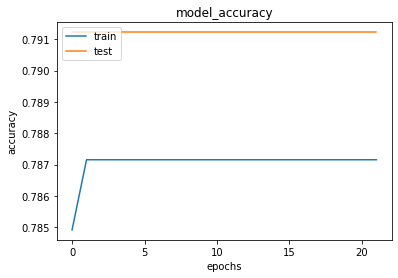

In [38]:
# summary accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc = 'upper left')
plt.show()